In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import wget

In [2]:
file = 'Experimento_Punto5.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    print('--File found---')
    Path_ = file

--File found---


In [3]:
Data = pd.read_csv(Path_,sep=',')

In [4]:
Data

,X,Y
0,0.0,-18
1,1.5,-13
2,2.0,0
3,3.8,5
4,4.2,3
5,5.9,10


In [5]:
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

In [6]:
def NewtonGregory(X,Y,x):
    Diff = Y.copy()
    for i in range(1,len(X)):
        for j in range(len(X)-1,i-1,-1):
            
            Diff[j] = (Diff[j]-Diff[j-1])/(X[j]-X[j-i])
            
    a = Diff[len(X) -1]    
    for i in range(len(X) - 2,-1,-1):
        a = a*(x - X[i])+ Diff[i]
    return a


    


In [7]:
x = np.linspace(np.min(X),np.max(X),100)
y = NewtonGregory(X,Y,x)

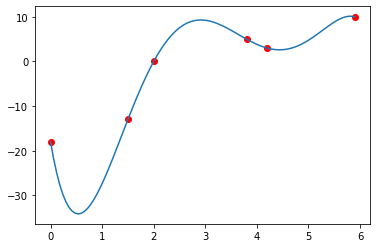

In [8]:
plt.scatter(X,Y,color='r')
plt.plot(x,y)

In [10]:
x = sym.Symbol('x',Real='True')
y = NewtonGregory(X,Y,x)

In [11]:
y

x*((x - 1.5)*((x - 2.0)*((3.35543188669546 - 0.34145435774264*x)*(x - 3.8) - 5.63946097126875) + 11.3333333333333) + 3.33333333333333) - 18.0

In [12]:
y = y.simplify()

In [13]:
y

-x*((x - 1.5)*((x - 2.0)*((0.34145435774264*x - 3.35543188669546)*(x - 3.8) + 5.63946097126875) - 11.3333333333333) - 3.33333333333333) - 18.0